In [57]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [59]:
# daatset api
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
!ls

cifar-10.zip  sample_data	    test     train     trainLabels.csv
kaggle.json   sampleSubmission.csv  test.7z  train.7z


In [61]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [62]:
!ls

cifar-10.zip  sample_data	    test     train     trainLabels.csv
kaggle.json   sampleSubmission.csv  test.7z  train.7z


In [63]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [65]:
archive1 = py7zr.SevenZipFile('/content/test.7z', mode='r')
archive1.extractall()     #archive.extractall(path='/content/Training Data')
archive1.close()

KeyboardInterrupt: ignored

In [66]:
!ls

cifar-10.zip  sample_data	    test     train     trainLabels.csv
kaggle.json   sampleSubmission.csv  test.7z  train.7z


Importing the Dependencies

In [67]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [68]:
filenames = os.listdir('/content/train')

In [69]:
type(filenames)

list

In [70]:
len(filenames)

50000

In [71]:
print(filenames[0:5])
print(filenames[-5:])

['48280.png', '48304.png', '36006.png', '19527.png', '12283.png']
['11874.png', '45001.png', '19972.png', '22391.png', '20952.png']


**Labels Processing**

In [72]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [73]:
labels_df.shape

(50000, 2)

In [74]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [75]:
labels_df[labels_df['id'] == 7776]

,id,label
7775,7776,deer


In [76]:
labels_df.head(20)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [77]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [78]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [79]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [80]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [81]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


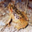

In [82]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

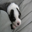

In [83]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [84]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [85]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [86]:
id_list = list(labels_df['id'])

In [87]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [88]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [89]:
type(data)

list

In [90]:
len(data)

50000

In [91]:
type(data[0])

numpy.ndarray

In [92]:
data[0].shape

(32, 32, 3)

In [94]:
data[0]     

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [93]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [95]:
type(X)

numpy.ndarray

In [96]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [98]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [99]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [100]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [101]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

**Building the Neural Network**

In [102]:
import tensorflow as tf
from tensorflow import keras

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add the first convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Add the second convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add the third convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add the fourth convolution layer
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first dense layer
model.add(Dense(64, activation='relu'))

# Add the second dense layer
model.add(Dense(64, activation='relu'))

# Add dropout layer
model.add(Dropout(0.5))

# Add the final dense layer with a softmax activation
model.add(Dense(10, activation='softmax'))


In [ ]:
#num_of_classes = 10

# setting up the layers of Neural Network

#model = keras.Sequential([
    
 #   keras.layers.Flatten(input_shape=(32,32,3)),
  #  keras.layers.Dense(64, activation='relu'),
   # keras.layers.Dense(num_of_classes, activation='softmax')
#])

In [104]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [106]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.8425 - acc: 0.7105 - val_loss: 0.9969 - val_acc: 0.6580
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.8171 - acc: 0.7203 - val_loss: 0.9518 - val_acc: 0.6675
Epoch 3/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.7836 - acc: 0.7334 - val_loss: 0.9527 - val_acc: 0.6737
Epoch 4/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.7545 - acc: 0.7432 - val_loss: 0.9864 - val_acc: 0.6708
Epoch 5/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.7297 - acc: 0.7521 - val_loss: 0.9659 - val_acc: 0.6752
Epoch 6/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.7040 - acc: 0.7567 - val_loss: 0.9508 - val_acc: 0.6830
Epoch 7/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.6845 - acc: 0.7654 - val_loss: 0.9898 - val_acc: 0.6793
Epoch 8/30
1125/1125 [==============================] - 4s 4ms

In [107]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 600.1226 - acc: 0.4224
Test Accuracy = 0.42239999771118164


In [118]:
# Choose a single image to test

img = cv2.imread('/content/train/45888.png')

# Preprocess the image
img = img.astype('float32') / 255.
img = np.expand_dims(img, axis=0)

# Predict
predictions = model.predict(img)

# Convert predictions to class labels
class_index = np.argmax(predictions[0])

# Print the predicted class
print("The predicted class is:", class_index)

1/1 [==============================] - 0s 18ms/step
The predicted class is: 5


In [119]:
def get_key(val):
    for key, value in labels_dictionary.items():
        if val == value:
            return key
    return None

key = get_key(class_index)
print(key) 


dog


**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()